# Audio Classification: Data Exploration and Preprocessing

**Course:** CSCI 6366 (Neural Networks and Deep Learning)  
**Project:** Audio Classification using CNN  
**Notebook:** Initial Data Exploration and Mel-spectrogram Visualization

## Overview

This notebook serves as the initial exploration phase for an audio classification project. We will:
1. Load and inspect audio waveform data from WAV files
2. Visualize audio signals in the time domain
3. Transform audio into mel-spectrogram representations suitable for deep learning
4. Visualize frequency-time representations

The goal is to understand the audio data structure and prepare it for training a Convolutional Neural Network (CNN) for classification tasks.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pathlib import Path


## Library Dependencies

This notebook relies on the following Python libraries:

- **`numpy`**: Fundamental library for numerical computations, array operations, and mathematical functions. Essential for handling audio data as arrays.

- **`matplotlib.pyplot`**: Visualization library for creating plots and figures. Used to display audio waveforms and spectrograms.

- **`librosa`**: Comprehensive audio analysis library that provides:
  - `librosa.load()`: Loads audio files (WAV, MP3, etc.) as numpy arrays
  - `librosa.feature.melspectrogram()`: Computes mel-scale spectrograms from audio signals
  - `librosa.display`: Specialized plotting functions for audio visualizations

- **`pathlib.Path`**: Modern Python path handling that provides platform-independent file path operations. More robust than string-based paths.


In [30]:
DATA_DIR = Path("../data").resolve()
example_audio_path = DATA_DIR / "dog" / "0d53e045_nohash_0.wav"

print("Audio file path:", example_audio_path)
print("Does this file exist?", example_audio_path.exists())


Audio file path: /Users/abhiyansainju/Desktop/GW Classes/Fall 2025/Neural Networks and Deep Learning CSCI_6366_80/Audio Classification/audio-classification-cnn/data/dog/0d53e045_nohash_0.wav
Does this file exist? True


## Loading Audio Data

In this section, we load the audio file from disk into memory. The `librosa.load()` function:
- Reads the WAV file and converts it to a floating-point audio signal
- Normalizes the amplitude to the range [-1, 1]
- Optionally resamples the audio to a specified sample rate (16000 Hz in our case)
- Returns the audio signal (`y`) and the sample rate (`sr`)

In [31]:
y, sr = librosa.load(example_audio_path, sr=16000)

print("Waveform shape:", y.shape)
print("Sample rate:", sr, "Hz")
print(f"Duration: {len(y) / sr:.2f} seconds")


Waveform shape: (16000,)
Sample rate: 16000 Hz
Duration: 1.00 seconds


### Audio Data Structure

- **`y`**: 1D NumPy array containing audio waveform samples
- **`sr`**: Sample rate in Hz (standardized to 16 kHz)
- **`duration`**: Audio duration in seconds


Visualizing the Audio Waveform

A waveform visualization shows how the audio amplitude changes over time. This is the most intuitive representation of audio data in the time domain. The plot helps us:
- Verify that the audio loaded correctly
- Inspect the amplitude envelope and temporal characteristics
- Identify any potential issues with the audio signal

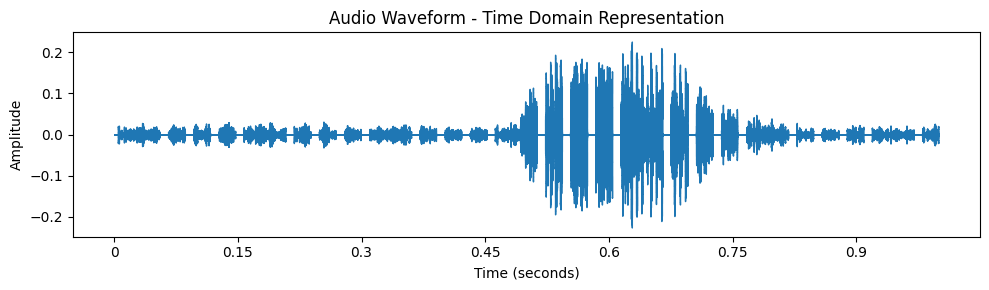

In [33]:
# Create a waveform visualization
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform - Time Domain Representation")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


## Computing the Mel-Spectrogram

While waveforms show audio in the time domain, neural networks for audio classification typically work better with frequency-domain representations. A **mel-spectrogram** is a 2D representation that shows:
- **Frequency content** (vertical axis) in the mel scale (a perceptual frequency scale that mimics human hearing)
- **Time** (horizontal axis)
- **Energy/intensity** (color intensity) at each frequency-time combination

This transformation converts a 1D audio signal into a 2D "image" that CNNs can process effectively.

### Mel-Spectrogram Parameters

The mel-spectrogram computation involves several key parameters:

- **`n_fft`**: Window size for the Fast Fourier Transform (FFT). Larger values provide better frequency resolution but worse time resolution. A value of 1024 is a common balance.

- **`hop_length`**: Number of samples between successive FFT windows. Determines the temporal resolution. Smaller values give more time frames but increase computation. Typically set to `n_fft // 2` (512 here).

- **`n_mels`**: Number of mel frequency bands. More bands provide finer frequency granularity but increase dimensionality. 128 is a standard choice that captures sufficient detail for classification.

- **`power`**: Exponent for the magnitude spectrum. `power=2.0` computes the power spectrogram (squared magnitude), which is commonly used in audio analysis.

In [34]:
n_fft = 1024
hop_length = 512
n_mels = 128

S = librosa.feature.melspectrogram(
    y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, power=2.0
)

print("Mel-spectrogram shape:", S.shape)


Mel-spectrogram shape: (128, 32)


In [35]:
S_db = librosa.power_to_db(S, ref=np.max)
print("Mel-spectrogram (dB) shape:", S_db.shape)


Mel-spectrogram (dB) shape: (128, 32)


#### Mel-Spectrogram Structure

- **`S`**: Raw mel-spectrogram - 2D array of shape `(n_mels, time_frames)`
- **`S_db`**: Log-scale version in decibels - better for visualization and CNN training

The `S_db` array serves as the 2D "image" input for the CNN.


Visualizing the Mel-Spectrogram

The mel-spectrogram visualization provides a comprehensive view of the audio's frequency content over time. This is the representation that will be used as input to our CNN. The visualization helps us:
- Understand the frequency patterns in the audio
- Verify that the transformation was computed correctly
- Inspect the temporal evolution of different frequency components

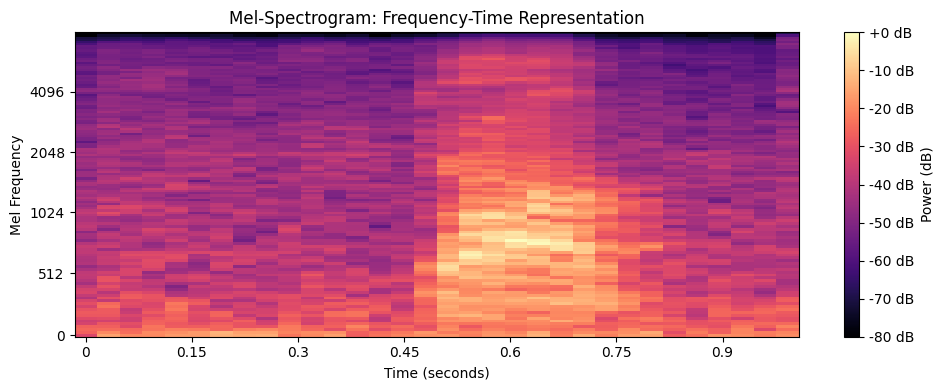

In [36]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB", label="Power (dB)")
plt.title("Mel-Spectrogram: Frequency-Time Representation")
plt.xlabel("Time (seconds)")
plt.ylabel("Mel Frequency")
plt.tight_layout()
plt.show()


In [37]:
dog_file = next((DATA_DIR / "dog").glob("*.wav"))
cat_file = next((DATA_DIR / "cat").glob("*.wav"))
bird_file = next((DATA_DIR / "bird").glob("*.wav"))

print("Dog example:", dog_file)
print("Cat example:", cat_file)
print("Bird example:", bird_file)
print("All exist?", dog_file.exists(), cat_file.exists(), bird_file.exists())


Dog example: /Users/abhiyansainju/Desktop/GW Classes/Fall 2025/Neural Networks and Deep Learning CSCI_6366_80/Audio Classification/audio-classification-cnn/data/dog/62581901_nohash_0.wav
Cat example: /Users/abhiyansainju/Desktop/GW Classes/Fall 2025/Neural Networks and Deep Learning CSCI_6366_80/Audio Classification/audio-classification-cnn/data/cat/e3e49931_nohash_0.wav
Bird example: /Users/abhiyansainju/Desktop/GW Classes/Fall 2025/Neural Networks and Deep Learning CSCI_6366_80/Audio Classification/audio-classification-cnn/data/bird/6a27a9bf_nohash_0.wav
All exist? True True True


### File Selection Method

The code uses `Path.glob()` to dynamically select `.wav` files from each class directory. The `next()` function extracts the first matching file, avoiding hardcoded filenames.


In [40]:
def load_mel_spectrogram(
    audio_path: Path,
    sr: int = 16000,
    n_fft: int = 1024,
    hop_length: int = 512,
    n_mels: int = 128,
) -> tuple[np.ndarray, np.ndarray, int, int]:
    """Load an audio file and compute its Mel-spectrogram in dB scale."""
    y, sr = librosa.load(audio_path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, power=2.0)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db, y, sr, hop_length


In [41]:
dog_S_db, dog_y, dog_sr, dog_hop = load_mel_spectrogram(dog_file)
cat_S_db, cat_y, cat_sr, cat_hop = load_mel_spectrogram(cat_file)
bird_S_db, bird_y, bird_sr, bird_hop = load_mel_spectrogram(bird_file)

print("Dog S_db shape:", dog_S_db.shape)
print("Cat S_db shape:", cat_S_db.shape)
print("Bird S_db shape:", bird_S_db.shape)


Dog S_db shape: (128, 32)
Cat S_db shape: (128, 32)
Bird S_db shape: (128, 32)


### Processing Results

All mel-spectrograms have consistent dimensions `(128, 32)` - essential for batch processing and CNN input. The uniformity ensures fair comparisons and proper tensor operations during training.


### Comparative Visualization of Audio Classes

A side-by-side comparison of mel-spectrograms from different classes allows us to visually identify distinguishing frequency patterns and validate that our preprocessing pipeline produces meaningful representations for classification.


/var/folders/mv/_crst16x3dgf4ry4hzbgnc200000gn/T/ipykernel_70098/328833775.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


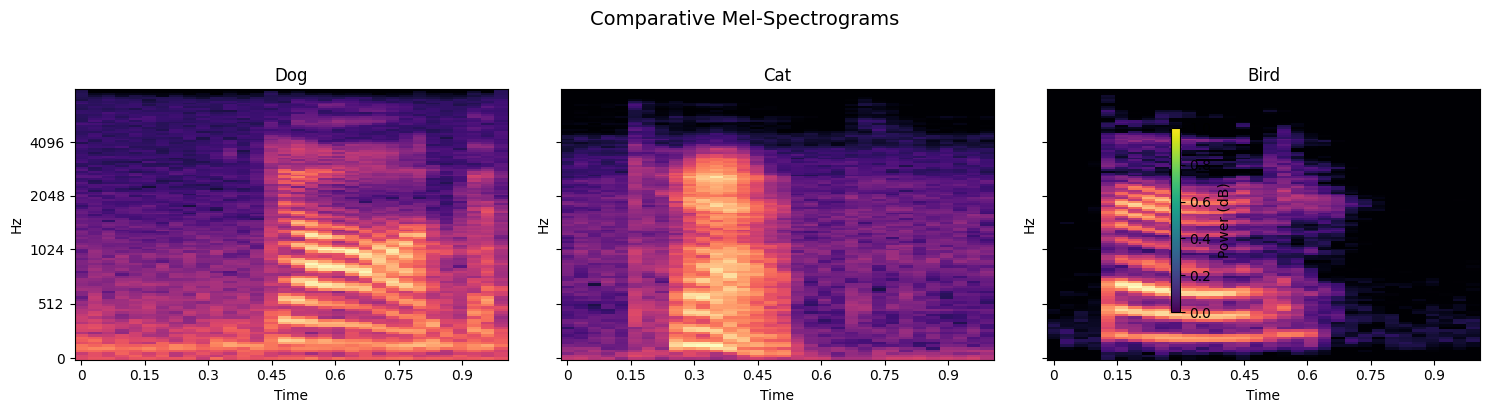

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

librosa.display.specshow(dog_S_db, sr=dog_sr, hop_length=dog_hop, x_axis="time", y_axis="mel", ax=axes[0])
axes[0].set_title("Dog")

librosa.display.specshow(cat_S_db, sr=cat_sr, hop_length=cat_hop, x_axis="time", y_axis="mel", ax=axes[1])
axes[1].set_title("Cat")

librosa.display.specshow(bird_S_db, sr=bird_sr, hop_length=bird_hop, x_axis="time", y_axis="mel", ax=axes[2])
axes[2].set_title("Bird")

fig.colorbar(plt.cm.ScalarMappable(), ax=axes, location="right", shrink=0.6, label="Power (dB)")
plt.suptitle("Comparative Mel-Spectrograms", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()
